[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [4]:
!pip install transformers[sentencepiece] datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.20.1-py3-none-any.whl (4.4 MB)
  Using cached datasets-2.3.2-py3-none-any.whl (362 kB)
  Using cached huggingface_hub-0.8.1-py3-none-any.whl (101 kB)
  Using cached xxhash-3.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached fsspec-2022.5.0-py3-none-any.whl (140 kB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached aiohttp-3.8.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Using cached asynctest-0.13.0-py3-none-any.whl (26 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached frozenlist-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manyli

## Datasets library

In [5]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [6]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [7]:
imdb['train'][0]

{'label': 0,
 'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are f

In [8]:
imdb['test'][:3]

{'label': [0, 0, 0],
 'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth 

In [9]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [10]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [11]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [12]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [13]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [14]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [15]:
imdb['unsupervised'][:3]

{'label': [-1, -1, -1],
 'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is

In [16]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [18]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"The husband-and-wife team of Bennie Fields and Blossom Seeley were huge stars in vaudeville, yet they made very few films. As is the case for some other performers of their era (George M. Cohan, Fanny Brice, Gertrude Lawrence) the most accessible...",0
1284,"9/10- 30 minutes of pure holiday terror. Okay, so it's not that scary. But it sure is fun.<br /><br />The Crypt Keeper (John Kassir) tales a tale of holiday FEAR, giving us all Christmas Goose... GosseBUMPS That is. Bwahahahahha. You should reall...",1
408,"I am currently sitting here, forcing myself to finish this. I figure I blew 6 bux on the VHS, might as well suffer for it. I remember about 4 or 5 years ago doing a search on the internet for ""War of the Worlds"" cause of the rumors of the Spielbe...",0
1282,"""Horrible People"" ought to be the subtitle of this horrible film. If you want to see ordinary people doing ordinary things, then look out of your window at real life. But if you want to see unpleasant people doing dull things, you'll have to watc...",0
1447,"Actually I'm surprised there were so many comments about this movie. I saw it as part of a Slavic film festival at a major American University. But nobody in USA has heard of it, which is a real shame! The dynamics between the people are what mak...",1
1144,"An excellent film depicting the cross currents in the lives of a multi-ethnic mix of not so ordinary people in the rural Pacific Northwest. Solid directing and writing along with fine acting, especially the performances by Kwami Taha and Dan Stow...",1
1381,"a timeless classic, wonderfully acted with perfect location settings, conjuring a marvelous atmospheric movie. a simple story mingled with humor and suspense. i wish that a video was available in Britain. i have seen this film on many occasions a...",1
181,"**1/2 for this Diane Keaton farce.<br /><br />Someone should tell Ms. Keaton, enough with your Annie Hall philosophy and hats.<br /><br />This flick is just too much as Keaton's daughter, Sara, dies in a traffic accident, while her boyfriend surv...",0
1183,"ok. for starters, taxi driver is amazing. this, this is not taxi driver or amazing. what it is is bad. but i thought it was bad funny, which means that it did have some redeeming qualities. like the dialogue...wow. there was more or less no plot,...",0
1103,"I'm sorry to report that I have seen this film several times. When it bombed at the box office, it was repeated nightly for about a month on HBO. And I watched it over and over because television in general is so bad--or was at that time. I no lo...",0


In [19]:
df.loc[0, 'text']

'While Bondarchuk was by no means a young man when he was commissioned to work on this project, he was still a novice director with only a single pictures, a successful adaptation of a short WWII story, to his name. Bondarchuk of course had already been an established acting star for a decade but thespian skills mean little behind the camera, and as a director he was woefully unprepared to undertake a production of such scale. And it shows through muddled shot compositions especially apparent in group scenes, often unfortunate camera positions, performances of wildly varying quality for the director was apparently so overwhelmed by the sheer magnitude of the task actors were apparently left to their own devices, awkward voiceovers that sound like radio broadcast announcements.<br /><br />Vidor\'s "War and Peace" was probably the main reason that prompted the Soviet government to spare no expense on this production. The USSR release of the Vidor\'s picture made quite a splash. Certainly

In [20]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'While Bondarchuk was by no means a young man when he was commissioned to work on this project, he was still a novice director with only a single pictures, a successful adaptation of a short WWII story, to his name. Bondarchuk of course had already been an established acting star for a decade but thespian skills mean little behind the camera, and as a director he was woefully unprepared to undertake a production of such scale. And it shows through muddled shot compositions especially apparent in group scenes, often unfortunate camera positions, performances of wildly varying quality for the director was apparently so overwhelmed by the sheer magnitude of the task actors were apparently left to their own devices, awkward voiceovers that sound like radio broadcast announcements.Vidor\'s "War and Peace" was probably the main reason that prompted the Soviet government to spare no expense on this production. The USSR release of the Vidor\'s picture made quite a splash. Certainly, Bondarchuk

In [21]:
df.label.value_counts()

1    804
0    796
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


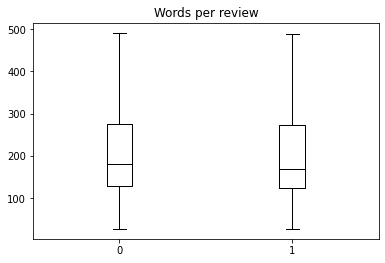

In [22]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [23]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
309,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
453,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
525,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
727,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
739,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
990,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
1036,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
1571,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38


In [24]:
imdb.reset_format()

## Tokenizer

In [25]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Parameter 'function'=<function tokenize_function at 0x7fcbf6c02050> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [26]:
print(imdb_encoded['train'][0])

{'text': 'While Bondarchuk was by no means a young man when he was commissioned to work on this project, he was still a novice director with only a single pictures, a successful adaptation of a short WWII story, to his name. Bondarchuk of course had already been an established acting star for a decade but thespian skills mean little behind the camera, and as a director he was woefully unprepared to undertake a production of such scale. And it shows through muddled shot compositions especially apparent in group scenes, often unfortunate camera positions, performances of wildly varying quality for the director was apparently so overwhelmed by the sheer magnitude of the task actors were apparently left to their own devices, awkward voiceovers that sound like radio broadcast announcements.<br /><br />Vidor\'s "War and Peace" was probably the main reason that prompted the Soviet government to spare no expense on this production. The USSR release of the Vidor\'s picture made quite a splash. 

## Tiny IMDB

In [27]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelWithLMHead']

In [28]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.wei

In [29]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [30]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_names=None,
label_smoothing_fac

In [31]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.700400,0.720672
2,0.708200,0.693938


In [37]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[0.06924158, 0.13900723],
       [0.00809241, 0.22694518],
       [0.04619494, 0.13714287],
       [0.03285521, 0.17786047],
       [0.06034657, 0.1269459 ],
       [0.03562299, 0.20412898],
       [0.10505365, 0.13605727],
       [0.02869171, 0.18619674],
       [0.02553949, 0.19039088],
       [0.00675196, 0.17907624]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7198009490966797, 'test_runtime': 0.2427, 'test_samples_per_second': 41.211, 'test_steps_per_second': 8.242})

In [38]:
preds.predictions.shape

(10, 2)

In [40]:
preds.predictions.argmax(axis= -1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [41]:
def get_accuracy(preds):
    predictions = preds.predictions.argmax(axis=-1)
    labels = preds.label_ids
    accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
    return {'accuracy': accuracy}


In [43]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.653900,0.646038,0.700000
2,0.651100,0.600750,0.700000


## Training run

In [44]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [45]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.542400,0.350046,0.857500
2,0.295900,0.304559,0.885000


In [46]:


trainer.evaluate()

{'epoch': 2.0,
 'eval_accuracy': 0.885,
 'eval_loss': 0.30455899238586426,
 'eval_runtime': 8.1199,
 'eval_samples_per_second': 49.262,
 'eval_steps_per_second': 3.079}

In [47]:
trainer.save_model()

In [48]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [49]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.5028885006904602}]

In [50]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.6588720679283142}]